In [47]:
import pandas as pd
from statsmodels.api import OLS
pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
%matplotlib inline

import math

import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
mpl.rcParams["figure.figsize"] = (15, 8)

import us

In [3]:
college_df = pd.read_csv('..\CollegeScorecard_Raw_Data\CollegeScorecard_Raw_Data\MERGED2012_PP.csv').set_index("INSTNM")
college_df.head()

C:\Users\Dave\Anaconda\lib\site-packages\pandas\io\parsers.py:1170: DtypeWarning: Columns (1427,1517,1532,1542,1545,1546,1575) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


,﻿UNITID,OPEID,opeid6,CITY,STABBR,ZIP,AccredAgency,INSTURL,NPCURL,sch_deg,...,PELL_RPY_3YR_RT_SUPP,NOPELL_RPY_3YR_RT_SUPP,FEMALE_RPY_3YR_RT_SUPP,MALE_RPY_3YR_RT_SUPP,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP,C150_L4_POOLED_SUPP,C150_4_POOLED_SUPP,C200_L4_POOLED_SUPP,C200_4_POOLED_SUPP
INSTNM,,,,,,,,,,,,,,,,,,,,,
Alabama A & M University,100654,100200,1002,Normal,AL,35762,NaN,NaN,NaN,3,...,0.440384615385,0.435294117647,0.469199178645,0.40465631929,0.458398744113,0.418864097363,NaN,NaN,NaN,NaN
University of Alabama at Birmingham,100663,105200,1052,Birmingham,AL,35294-0110,NaN,NaN,NaN,3,...,0.744820616473,0.814925373134,0.78531598513,0.749778956676,0.760399334443,0.786069651741,NaN,NaN,NaN,NaN
Amridge University,100690,2503400,25034,Montgomery,AL,36117-3553,NaN,NaN,NaN,3,...,0.458563535912,0.605263157895,0.465277777778,0.544642857143,0.496,0.514851485149,NaN,NaN,NaN,NaN
University of Alabama in Huntsville,100706,105500,1055,Huntsville,AL,35899,NaN,NaN,NaN,3,...,0.726251276813,0.842342342342,0.778034682081,0.767926988266,0.770916334661,0.785009861933,NaN,NaN,NaN,NaN
Alabama State University,100724,100500,1005,Montgomery,AL,36104-0271,NaN,NaN,NaN,3,...,0.291703442189,0.39175257732,0.33665480427,0.272277227723,0.279705573081,0.310344827586,NaN,NaN,NaN,NaN


In [80]:
college_df[['C150_4', 'CONTROL']].head()

,C150_4,CONTROL
INSTNM,,
Alabama A & M University,0.3222,1
University of Alabama at Birmingham,0.4815,1
Amridge University,0.0000,2
University of Alabama in Huntsville,0.4732,1
Alabama State University,0.2635,1


In [29]:
states_str = '''AK, AL, AR, AZ, CA, CO, CT, DC, DE, FL, GA, HI, IA, ID, IL, IN, KS, KY, LA, MA, MD, ME, MI, MN, MO, MS, MT, NC, ND, NE, NH, NJ, NM, NV, NY, OH, OK, OR, PA, RI, SC, SD, TN, TX, UT, VA, VT, WA, WI, WV, WY'''
states = states_str.split(', ')
print states
len(states)

['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']


51

In [103]:
completion_by_state_df = college_df[college_df.STABBR.isin(states) & college_df.CONTROL == 1][['C150_4', 'STABBR']]\
    .groupby('STABBR').mean()
completion_by_state_df

,C150_4
STABBR,
AK,0.252250
AL,0.418084
AR,0.308208
AZ,0.412946
CA,0.491837
CO,0.339313
CT,0.462192
DC,0.232125
DE,0.575550


In [32]:
len(completion_by_state_df.index)

51

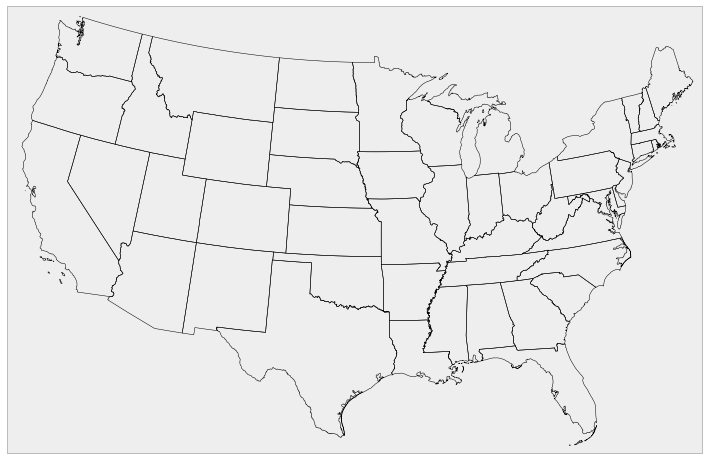

In [37]:
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon

# the below is copied from https://github.com/matplotlib/basemap/blob/master/examples/fillstates.py
# Lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
            projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
# draw state boundaries.
shp_info = m.readshapefile('st99_d00','states',drawbounds=True)

In [111]:
# choose a color for each state based on completion rate
colors={}
statenames=[]
cmap = plt.cm.hot # use 'hot' colormap
vmin = min(completion_by_state_df.C150_4)
vmax = max(completion_by_state_df.C150_4) # set range.
for shapedict in m.states_info:
    statename = shapedict['NAME']
    # skip Puerto Rico and add UTAH because it wasn't working correctly
    if statename not in ['Puerto Rico']:
        if statename not in ['Utah']:
            abbreviation = us.states.lookup(unicode(statename)).abbr
        else: 
            abbreviation = "UT"   
        completion_rate = completion_by_state_df.loc[abbreviation]['C150_4']
        # calling colormap with value between 0 and 1 returns
        # rgba value.  Invert color range (hot colors are high
        # completion rate), take sqrt root to spread out colors more.
        colors[statename] = cmap(1.-(completion_rate-vmin)/(vmax-vmin))[:3] 
    statenames.append(statename)

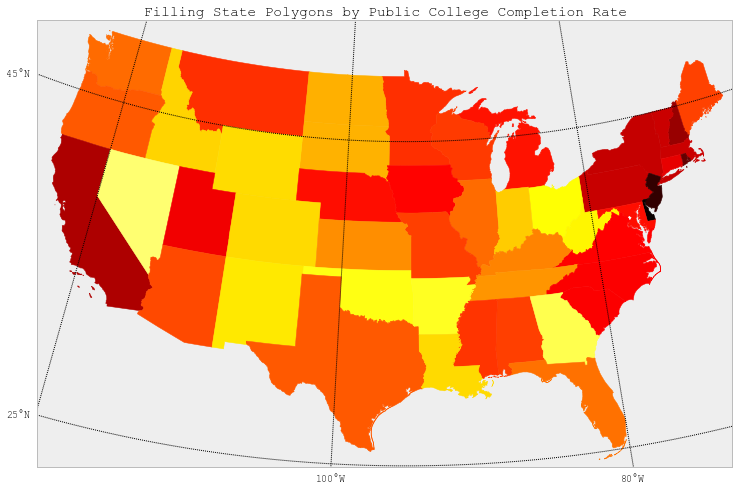

In [112]:
# cycle through state names, color each one.
ax = plt.gca() # get current axes instance
for nshape,seg in enumerate(m.states):
    # skip Puerto Rico
    if statenames[nshape] not in ['Puerto Rico']:
        color = rgb2hex(colors[statenames[nshape]]) 
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)
# draw meridians and parallels.
m.drawparallels(np.arange(25,65,20),labels=[1,0,0,0])
m.drawmeridians(np.arange(-120,-40,20),labels=[0,0,0,1])
plt.title('Filling State Polygons by Public College Completion Rate')
plt.show()